In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn import model_selection,tree
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [42]:
dataset = pd.read_csv('diabetes.csv',sep=',')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
diab_1=dataset[dataset.Outcome==1]
diab_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [44]:
diab_0=dataset[dataset.Outcome==0]
diab_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [45]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [46]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
X = dataset.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [48]:
y = dataset.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [50]:
Aura = tree.DecisionTreeClassifier()              #USING DECISION TREE

In [51]:
x = 0                       

for i in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y , test_size= 0.2)
    Aura.fit(x_train, y_train)
    accuracy = Aura.score(x_test, y_test)
    if(accuracy>x):
        x = accuracy
        
print("Best Accuracy : ",x*100)

Best Accuracy :  77.92207792207793


In [9]:
Ethan = RandomForestClassifier(n_estimators=1000)            #USING RANDOM FOREST

In [49]:
x = 0                       

for i in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y , test_size= 0.2)
    Ethan.fit(x_train, y_train)
    accuracy = Ethan.score(x_test, y_test)
    if(accuracy>x):
        x = accuracy
        
print("Best Accuracy : ",x*100)

Best Accuracy :  77.27272727272727


In [52]:
Y_predict = Aura.predict(x_test)                              #Metrics
conn_matrix = confusion_matrix(Y_predict, y_test)
conn_matrix

array([[79, 26],
       [16, 33]], dtype=int64)

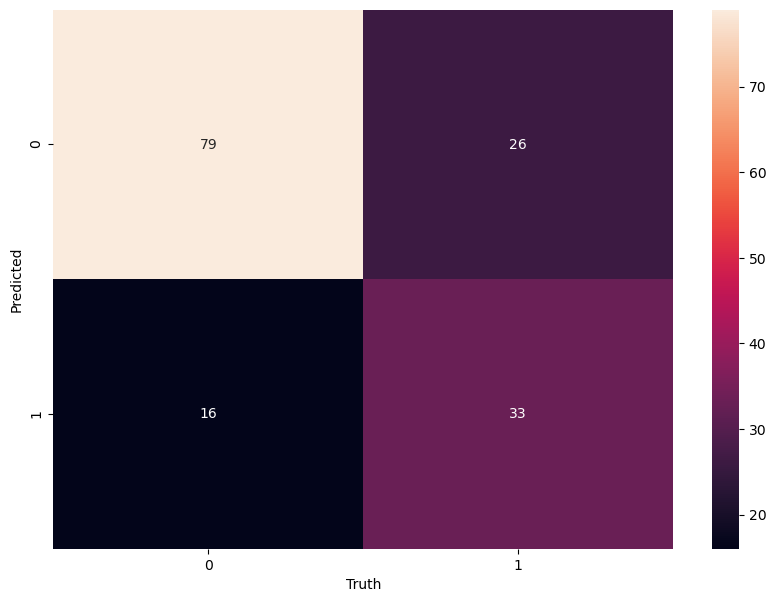

In [53]:
plt.figure(figsize = (10,7))
sn.heatmap(conn_matrix, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

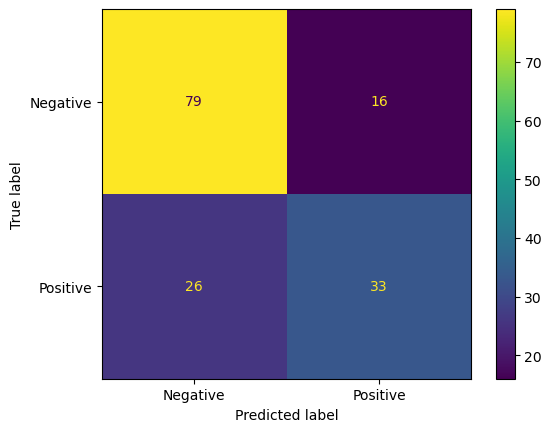

In [58]:
metrics.plot_confusion_matrix(Aura, x_test, y_test, display_labels=['Negative', 'Positive'])      #CONFUSION MATRIX
plt.show()

In [60]:
confusion = metrics.confusion_matrix(y_test,Y_predict)
confusion.ravel() 

array([79, 16, 26, 33], dtype=int64)

In [61]:
accuracy = metrics.accuracy_score(y_test,Y_predict)          #ACCURACY
accuracy 

0.7272727272727273

In [62]:
precision_positive = metrics.precision_score(y_test,Y_predict, pos_label=1)    #PRECISION
precision_negative = metrics.precision_score(y_test,Y_predict, pos_label=0)
precision_positive, precision_negative 

(0.673469387755102, 0.7523809523809524)

In [63]:
recall_sensitivity = metrics.recall_score(y_test,Y_predict, pos_label=1)   #RECALL
recall_specificity = metrics.recall_score(y_test,Y_predict, pos_label=0)
recall_sensitivity, recall_specificity 

(0.559322033898305, 0.8315789473684211)

In [64]:
f1_p = metrics.f1_score(y_test,Y_predict, pos_label=1)         #F1-SCORE
f1_n = metrics.f1_score(y_test,Y_predict, pos_label=0)
f1_p, f1_n

(0.611111111111111, 0.79)

In [66]:
print(metrics.classification_report(y_test,Y_predict))     #ALL TOGETHER

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        95
           1       0.67      0.56      0.61        59

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.73      0.72       154

